 Proyecto de análisis de sentimientos realizado sobre una colección de tuits que abordan el tema del feminismo. El objetivo principal es identificar y categorizar las emociones predominantes en estas publicaciones utilizando un modelo preentrenado de procesamiento de lenguaje natural (PLN).

                                                texto         label
0   El feminismo arruinó el mundo y algunas aún no...  Muy Negativo
1   @perezreverte Sobre mujer y #feminismo hay muc...  Muy Positivo
2   Erradicando toda clase de injusticias: El Movi...  Muy Negativo
3   La mejor ministra que ha tenido este país #ire...  Muy Positivo
4   Todas las políticas woke quieren acabar con el...  Muy Positivo
5   Y finalmente la #masculinidad #tóxica se basa ...  Muy Negativo
6   Me cago en la cuotas vaginales. Ahora resulta ...  Muy Positivo
7   SÍ. SOY FEMINISTA. #feminismo #igualdad #8Marz...  Muy Negativo
8   En el autobús, 8 personas hablando de machismo...  Muy Negativo
9   el feminismo es la justicia de este siglo #fem...  Muy Positivo
10  Sin #Abolición de la #Prostitución, no habrá i...  Muy Negativo
11  Viva la LUCHA FEMINISTA #feminismo #igualdad #...  Muy Positivo
12  «No hay barrera cerradura, ni cerrojo que pued...  Muy Positivo
13  Emmeline Pankhurst fue la líder del movimien

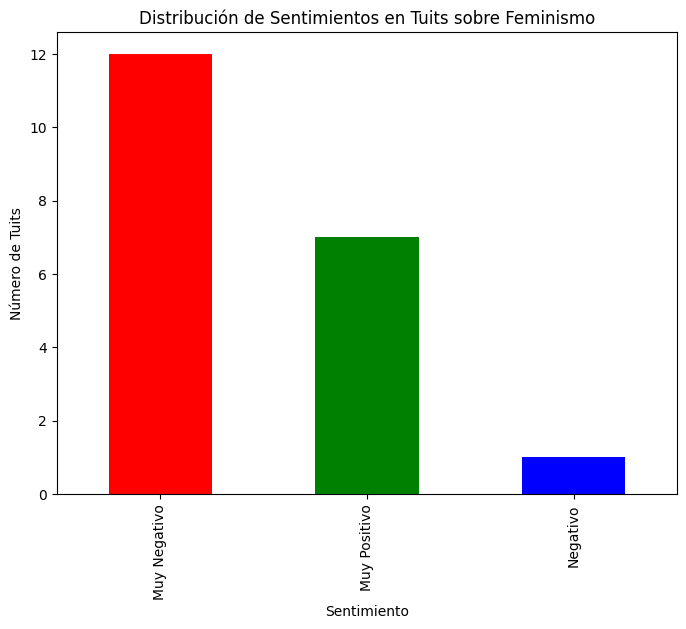

In [2]:
# Importaciones necesarias
import pandas as pd
from transformers import pipeline
import matplotlib.pyplot as plt

# Cargar el pipeline de análisis de sentimientos con un modelo preentrenado
nlp = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

# Lista de tuits para analizar
tuits = [
    "El feminismo arruinó el mundo y algunas aún no la ven.",
    "@perezreverte Sobre mujer y #feminismo hay mucho ruido, y a veces, mucha demagogia y mucho folclore. Lo que hemos querido ha sido traer a autoridades, un discurso serio de mujeres con una presencia y una trayectoria importante y consolidada, mujeres decisivas e influyentes de verdad, no para que nos cuenten lo que debe ser la mujer en el futuro, que todos lo sabemos, sino cómo es la mujer ahora y cómo se ha hecho, hasta dónde han llegado, por qué, cómo y contra qué. Ese tipo de mujeres que son las que nos interesan de verdad, con discursos solventes y serios, con autoridad, son las que realmente van a ocupar los asientos en estas tres jornadas.",
    "Erradicando toda clase de injusticias: El Movimiento Feminista es inherentemente interseccional, lo que significa que reconoce y aborda las intersecciones de la opresión, incluidas la raza, la clase, la sexual…",
    "La mejor ministra que ha tenido este país #irenemontero #feminismo",
    "Todas las políticas woke quieren acabar con el prototipo de hombre necesario para la sociedad",
    "Y finalmente la #masculinidad #tóxica se basa en lo q dije pq si la mujer deja de depender de un hombre, el hombre ve que ya no aporta, q ya no le dependen,…y deja de sentirse hombre",
    "Me cago en la cuotas vaginales. Ahora resulta que la empresa que me echó de la formación se arrepiente y me ofrece la posibilidad de trabajar con ellos, y yo ocupo el lugar de una mujer que no ha durado ni un día. Alucinante.",
    "SÍ. SOY FEMINISTA. #feminismo #igualdad #8Marzo #8M",
    "En el autobús, 8 personas hablando de machismo en España. 7 tíos jóvenes diciendo que hay machismo y la única tía jóven niega que haya machismo. Los hombres jóvenes están agilipollados.",
    "el feminismo es la justicia de este siglo #feminismo #irenemontero #8Marzo #8M",
    "Sin #Abolición de la #Prostitución, no habrá igualdad El #Feminismo es #Abolicionista. Los seres humanos no son mercancía que vender y con la que tratar. #AbolicionProstitucion #ProstitucionEsViolenciaSexual",
    "Viva la LUCHA FEMINISTA #feminismo #igualdad #8Marzo #8M",
    "«No hay barrera cerradura, ni cerrojo que puedas imponer a la libertad de tu mente» Virginia Woolf #TalDiaComoHoy moría una de las grandes de la historia dla #literatura en general y del #feminismo #NOALOLVIDO #ComparteCultura #Cultura #MemoriaHistórica #feminismo",
    "Emmeline Pankhurst fue la líder del movimiento feminista y sufragista del Reino Unido. Fue encarcelada en múltiples ocasiones y llevó a cabo varias huelgas de hambre dentro de la prisión a modo de protesta. #feminismo #feministasabolicionistas #feminismoradical",
    "Las feministas vandalizaron el #8M la Universidad del Rosario en #Bogota. Han pasado 20 días y nada que limpian. ¡Dañaron nuestro patrimonio cultural y hay que saber cuánto nos costará su chiste a la ciudadanía! #NoAlVandalismo #feminismo #izquierda #Colombia",
    "#Feminismo #Hombres #Mujeres #DerechosHumanos Lo dicho: Las feministas tienen envidia de pene.",
    "Las denuncias falsas no existen ya... Al menos 1 de cada 7 de todos los hombres ha sufrido una acusación falsa de agresión o violencia sexual. Eso es mucho más que los agresores auténticos... En divorcios, más del 50% de denuncias resultan ser falsas",
    "Miles de hombres se suicidan en nuestro país cada año Cuántos más tendremos que ver morir para que paren esta masacre? Tienen algo que decir sobre esto las mujeres que denuncian en falso?",
    "No somos mujeres. Les damos igual. No. No les damos igual. Peor aún…",
    "No, no hay ningún problema con estar sola. El problema radica en la razón por la que estás sola, si es por odio, resentimiento o porque te has comido la narrativa del 'empoderamiento', entonces si hay un problema; porque esa soledad, no viene de un corazón sano."
]

# Analizar los sentimientos de cada tuit
resultados_sentimientos = []
for tuit in tuits:
    result = nlp(tuit)
    label = result[0]['label']
    score = result[0]['score']
    resultados_sentimientos.append({"texto": tuit, "label": label, "score": score})

# Convertir los resultados a un DataFrame
df_resultados = pd.DataFrame(resultados_sentimientos)

# Simplificar las etiquetas del modelo
df_resultados['label'] = df_resultados['label'].replace({
    "1 star": "Muy Negativo",
    "2 stars": "Negativo",
    "3 stars": "Neutral",
    "4 stars": "Positivo",
    "5 stars": "Muy Positivo"
})

# Mostrar el DataFrame final
print(df_resultados[['texto', 'label']])

# Conteo de tuits por categoría
conteo_final = df_resultados['label'].value_counts()

# Gráfico de barras para la distribución de sentimientos
plt.figure(figsize=(8, 6))
conteo_final.plot(kind='bar', color=['red', 'green', 'blue'])
plt.title('Distribución de Sentimientos en Tuits sobre Feminismo')
plt.xlabel('Sentimiento')
plt.ylabel('Número de Tuits')
plt.show()